In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Year', 'Value']]
beehives.columns = ['Area', 'Year', 'Beehives']
beehives[beehives.Area == 'World'].head()

,Area,Year,Beehives
137235,World,1961,49173473.0
137236,World,1962,49639027.0
137237,World,1963,49970283.0
137238,World,1964,49625534.0
137239,World,1965,50368109.0


In [4]:
crops = pd.read_csv('data/FAOSTAT/Production_Crops_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
crops = crops.loc[(crops['Element'] == 'Yield'), ['Area', 'Item', 'Year', 'Value']]
crops.reset_index(drop=True, inplace=True)
crops.sort_values(inplace=True, by=['Area', 'Item', 'Year'])
crops.columns = ['Area', 'Item', 'Year', 'Yield']
crops[crops.Area == 'World'].head()

,Area,Item,Year,Yield
530798,World,Agave fibres nes,1961,10779.0
530799,World,Agave fibres nes,1962,9988.0
530800,World,Agave fibres nes,1963,10261.0
530801,World,Agave fibres nes,1964,10447.0
530802,World,Agave fibres nes,1965,10408.0


In [5]:
beehives_world = beehives[beehives.Area == 'World']
crops_world = crops[crops.Area == 'World']

In [6]:
joined = beehives_world.merge(crops_world)
joined.drop('Area', inplace=True, axis=1)

In [7]:
joined

,Year,Beehives,Item,Yield
0,1961,49173473.0,Agave fibres nes,10779.0
1,1961,49173473.0,"Almonds, with shell",10298.0
2,1961,49173473.0,"Anise, badian, fennel, coriander",6671.0
3,1961,49173473.0,Apples,99059.0
4,1961,49173473.0,Apricots,61753.0
...,...,...,...,...
9654,2017,90999730.0,"Walnuts, with shell",34888.0
9655,2017,90999730.0,Watermelons,340534.0
9656,2017,90999730.0,Wheat,35312.0
9657,2017,90999730.0,Yams,85297.0


In [8]:
df_dict = {}

for item in crops.Item.unique():
    df_dict[item] = crops[(crops.Item == item) & (crops.Area == 'World')]['Yield'].tolist()

In [9]:
to_remove = []

for k in df_dict.items():
    if len(k[1]) != 57:
        to_remove.append(k[0])
        
for key in to_remove:
    del df_dict[key]
    
crops_features = pd.DataFrame(df_dict)
crops_features.index = pd.to_datetime(list(map(str, sorted(crops.Year.unique()))))
crops_features

,"Almonds, with shell","Anise, badian, fennel, coriander",Apples,Apricots,Barley,Berries nes,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",...,Persimmons,Quinoa,Ramie,Yautia (cocoyam),Areca nuts,Gooseberries,Kapok fruit,Mushrooms and truffles,Poppy seed,"Sugar crops, nes"
1961-01-01,10298.0,6671.0,99059.0,61753.0,13282.0,80309.0,12424.0,13532.0,109645.0,13363.0,...,80901.0,6172.0,11700.0,50748.0,7127.0,38888.0,12814.0,1678397.0,5239.0,51610.0
1962-01-01,5797.0,6749.0,118880.0,48723.0,15254.0,77842.0,13122.0,14275.0,105533.0,13970.0,...,68340.0,6707.0,11985.0,51879.0,6885.0,39911.0,12970.0,1621372.0,5354.0,51455.0
1963-01-01,7819.0,6559.0,112283.0,60021.0,14286.0,77719.0,13152.0,14401.0,101153.0,14083.0,...,75555.0,7444.0,11965.0,51051.0,6983.0,40970.0,14785.0,1546328.0,5098.0,51356.0
1964-01-01,8079.0,6779.0,116368.0,57709.0,15512.0,79118.0,13632.0,14938.0,103188.0,14286.0,...,75154.0,7074.0,12004.0,51386.0,6915.0,38869.0,15086.0,1628106.0,3741.0,51016.0
1965-01-01,7661.0,7035.0,107601.0,59209.0,15479.0,80354.0,13699.0,14967.0,108560.0,14779.0,...,65924.0,6959.0,11865.0,51953.0,6760.0,40388.0,15320.0,1608508.0,4608.0,51532.0
1966-01-01,7588.0,6522.0,107630.0,54855.0,16535.0,73262.0,14804.0,16102.0,132639.0,15641.0,...,57402.0,6124.0,11998.0,54316.0,6668.0,38393.0,15467.0,1586522.0,4799.0,52326.0
1967-01-01,9267.0,6836.0,117639.0,68084.0,16955.0,73997.0,15175.0,16533.0,137621.0,16608.0,...,59557.0,7105.0,12099.0,56311.0,7202.0,36997.0,15141.0,1685162.0,4680.0,53623.0
1968-01-01,8244.0,7498.0,105815.0,66309.0,17931.0,74095.0,15559.0,16964.0,129100.0,16518.0,...,51340.0,6201.0,12191.0,55161.0,7397.0,40666.0,13651.0,1704004.0,4819.0,55181.0
1969-01-01,7344.0,6560.0,116406.0,63188.0,17821.0,73533.0,15652.0,17088.0,138491.0,16849.0,...,58480.0,5576.0,12440.0,57474.0,6991.0,41728.0,10734.0,1904460.0,6184.0,56894.0
1970-01-01,7372.0,6516.0,97186.0,58722.0,18054.0,70840.0,16095.0,17655.0,128494.0,16898.0,...,48334.0,6002.0,12520.0,59516.0,6852.0,42896.0,11052.0,2017384.0,6459.0,68974.0


In [10]:
beehives_world = beehives[beehives.Area == 'World']['Beehives']

X_train = crops_features.iloc[:-10]
X_test = crops_features.iloc[-10:]
y_train = beehives_world.iloc[:-10]
y_test = beehives_world.iloc[-10:]

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

-0.9261537109067812

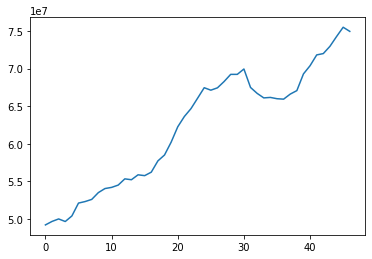

In [12]:
plt.plot(list(y_train))

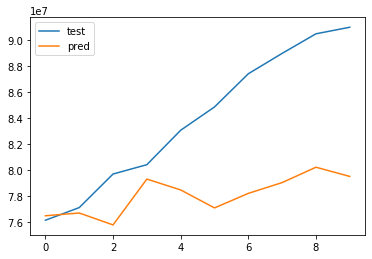

In [13]:
plt.plot(list(y_test), label='test')
plt.plot(y_pred, label='pred')
plt.legend();

In [14]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(crops_features, beehives_world)
selector.support_

selector.ranking_

array([109,  75,  35, 124,  79,  74,  97, 100, 140,  22,   3, 134,  98,
        71,  38,  73, 122,  16,  64,  82, 116,  44,  27, 102,  66,  15,
        87,  63, 133,  56, 123, 157,  43,  61, 141,  24, 149,  39, 135,
       158, 136,  90,  72,  48, 119,  13,  62,  12, 110, 152,  76, 113,
        23, 101, 155,  84,  33,  14,  53,   5,  41,  40,  34,   4,  20,
         1, 150, 142,  86,  68,  32,  85,  80, 104, 139, 148, 132, 143,
        57,  49, 144,  21, 107,  36,  26,  45, 120,  50,  54, 117, 154,
       115,   1,  78, 129,  31, 138, 145,  93, 126,  17,  30, 114,  89,
         6, 147,  51,  81,  37,  11,  25,  88,  96,  67,  99,  42,  19,
        58,   2,   8,   1, 118,  65,  46, 103, 105,  94, 121,  60,  28,
        10, 156, 108,   9,  91, 159,  83,  70,  69,  52,  95, 131, 137,
        77,  92,  18, 111, 153,  59,   1,  47, 125, 106,  29,   1, 128,
        55, 112, 127,   7, 146, 151, 130])

In [15]:
list(crops_features.columns[selector.ranking_])

['Okra',
 'Coconuts',
 'Spices, nes',
 'Roots and tubers, nes',
 'Cucumbers and gherkins',
 'Cocoa, beans',
 'Lentils',
 'Maize, green',
 'Tung nuts',
 'Onions, dry',
 'Apricots',
 'Sweet potatoes',
 'Lettuce and chicory',
 'Chillies and peppers, green',
 'Sunflower seed',
 'Cloves',
 'Rapeseed',
 'Linseed',
 'Cauliflowers and broccoli',
 'Fibre crops nes',
 'Pigeon peas',
 'Wheat',
 'Plums and sloes',
 'Manila fibre (abaca)',
 'Cherries',
 'Grapes',
 'Ginger',
 'Castor oil seed',
 'String beans',
 'Cabbages and other brassicas',
 'Raspberries',
 'Areca nuts',
 'Watermelons',
 'Cashewapple',
 'Vanilla',
 'Peaches and nectarines',
 'Grain, mixed',
 'Treenuts,Total',
 'Tangerines, mandarins, clementines, satsumas',
 'Gooseberries',
 'Taro (cocoyam)',
 'Hazelnuts, with shell',
 'Cinnamon (canella)',
 'Bambara beans',
 'Pumpkins, squash and gourds',
 'Fruit, fresh nes',
 'Cassava',
 'Fruit, citrus nes',
 'Onions, shallots, green',
 'Maté',
 'Coffee, green',
 'Peas, green',
 'Oranges',
 'Ma

In [31]:
crops_features_small = crops_features.loc[:, crops_features.columns[selector.ranking_[:22]]]

X_train = crops_features_small.iloc[:-15]
X_test = crops_features_small.iloc[-15:]
y_train = beehives_world.iloc[:-15]
y_test = beehives_world.iloc[-15:]

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.9068423421897824

In [33]:
reg.coef_

array([-1.97750171e+02, -1.54712593e+01,  2.54384638e+00,  3.02898991e+02,
        6.36294538e+01,  2.56499253e+03,  7.66392938e+02,  3.03608541e+01,
       -5.83869732e+00, -6.05725769e+01,  4.90809919e+01,  3.47978346e+01,
       -1.25124333e+01, -7.00198512e+00,  1.93923630e+02, -8.12582491e+01,
        9.75521894e+02, -9.80662027e+02, -3.18320399e+01, -1.36827098e+02,
        3.80129271e+02,  4.17830472e+00])

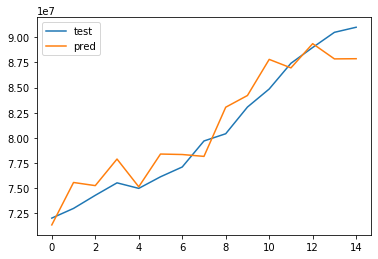

In [32]:
plt.plot(list(y_test), label='test')
plt.plot(y_pred, label='pred')
plt.legend();

# Predict beehives density from crop yields
Either put size of the country as a feature or predict the beehives density (beehives number divided by country area)

In [178]:
crops_1994 = crops[crops.Year >= 1994].copy()
crops_1994

,Area,Item,Year,Yield
18,Afghanistan,"Almonds, with shell",1994,16364.0
19,Afghanistan,"Almonds, with shell",1995,16364.0
20,Afghanistan,"Almonds, with shell",1996,16364.0
21,Afghanistan,"Almonds, with shell",1997,16364.0
22,Afghanistan,"Almonds, with shell",1998,16364.0
...,...,...,...,...
530136,Zimbabwe,Wheat,2013,23430.0
530137,Zimbabwe,Wheat,2014,21958.0
530138,Zimbabwe,Wheat,2015,20486.0
530139,Zimbabwe,Wheat,2016,19014.0


In [179]:
rm_countries = []
rm_countries += list(set(crops[crops.Year == 2017].Area.unique()) - set(crops[crops.Year == 1994].Area.unique()))
rm_countries += list(set(crops[crops.Year == 1994].Area.unique()) - set(crops[crops.Year == 2017].Area.unique()))
crops_1994 = crops_1994[~crops_1994.Area.isin(rm_countries)]

In [194]:
rm_crops = []

len(crops_1994) == len(crops_1994.Area.unique()) * len(crops_1994.Item.unique()) * len(crops_1994.Year.unique())

False

In [195]:
crops_1994

,Area,Item,Year,Yield
18,Afghanistan,"Almonds, with shell",1994,16364.0
19,Afghanistan,"Almonds, with shell",1995,16364.0
20,Afghanistan,"Almonds, with shell",1996,16364.0
21,Afghanistan,"Almonds, with shell",1997,16364.0
22,Afghanistan,"Almonds, with shell",1998,16364.0
...,...,...,...,...
530136,Zimbabwe,Wheat,2013,23430.0
530137,Zimbabwe,Wheat,2014,21958.0
530138,Zimbabwe,Wheat,2015,20486.0
530139,Zimbabwe,Wheat,2016,19014.0


In [313]:
index = pd.MultiIndex.from_product([crops_1994.Area.unique(), crops_1994.Year.unique()], names = ["Area", "Year"])
df = pd.DataFrame(index = index).reset_index()

In [314]:
for item in crops_1994.Item.unique():
    right = crops_1994.loc[crops_1994.Item == item, ['Area', 'Year', 'Yield']]
    
    
    
    if len(right) >= len(df)/20:
        df = df.merge(right, how='left', on=['Area', 'Year'])
        df = df.rename(columns={'Yield': item})

In [331]:
df = df[df.columns[df.isna().sum() < 1500]].dropna()
df

In [335]:
df = df.merge(beehives)

In [347]:
df.dropna(inplace=True)

In [361]:
df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
0,Africa,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0,14069000.0
1,Africa,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0,14062337.0
2,Africa,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0,14395882.0
3,Africa,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0,14158420.0
4,Africa,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0,14057474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Zambia,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0
2178,Zambia,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0
2179,Zambia,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0
2180,Zambia,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0


> The problem I have here is that a lot of data is missing and I have to make a tradeof between how many features (crops) vs how many data points I will get without null values

In [391]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [392]:
from sklearn.linear_model import Ridge

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.054769379992284255

Now I don't have any motivation left to try and figure out if this is really useless or it is just some problem with predicting this with ridge regression or something similar that could be easily fixed. It's a shame because this could be an interesting thins, but it's hard to use this data.

First thing I should do is convert area to real area (square meters) instead of country names which cannot be used in the model